Instantiating a ConvNet

Create a Convnet with two stacks of conv + pool

In [1]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Using TensorFlow backend.
/home/ravitha/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ravitha/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ravitha/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ravitha/ana

Displaying the model

In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

Training convnet on MNIST images

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.1713 - acc: 0.9453
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0463 - acc: 0.9859
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0324 - acc: 0.9902
Epoch 4/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.0255 - acc: 0.9922
Epoch 5/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0201 - acc: 0.9937


Evaluating the trained model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 25us/step


In [8]:
print(test_loss)
print(test_acc)

0.033998139584957246
0.9901


In [ ]:
Instantiating a small convnet for differentiating ants and bees

In [3]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

Configuring our model for training

In [5]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [14]:
train_dir = '/home/ravitha/D/pyTorch_models/hymenoptera_data/train'
val_dir = '/home/ravitha/D/pyTorch_models/hymenoptera_data/val/'

In [15]:
from keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                # This is the target directory
                train_dir,
                # All images will be resized to 150x150
                target_size=(150, 150),
                batch_size=20,
                # Since we use binary_crossentropy loss, we need binary labels
                class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                val_dir,
                target_size=(150, 150),
                batch_size=20,
                class_mode='binary')

Found 244 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


Displaying the shapes of a batch of data and labels

In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Fitting our model using a batch generator

In [18]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=5,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/5
100/100 [==============================] - 16s 163ms/step - loss: 0.0100 - acc: 0.9960 - val_loss: 2.3853 - val_acc: 0.6278
Epoch 2/5
100/100 [==============================] - 15s 153ms/step - loss: 0.0098 - acc: 0.9970 - val_loss: 2.5374 - val_acc: 0.6305
Epoch 3/5
100/100 [==============================] - 15s 152ms/step - loss: 0.0169 - acc: 0.9955 - val_loss: 2.5983 - val_acc: 0.6347
Epoch 4/5
100/100 [==============================] - 15s 152ms/step - loss: 0.0087 - acc: 0.9975 - val_loss: 2.8103 - val_acc: 0.6242
Epoch 5/5
100/100 [==============================] - 15s 153ms/step - loss: 6.7464e-05 - acc: 1.0000 - val_loss: 3.0219 - val_acc: 0.6414


Saving our model

In [19]:
model.save('ants_and_bees.h5')

Displaying curves of loss and accuracy during training

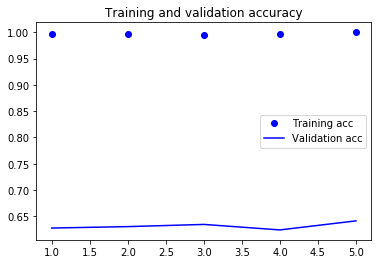

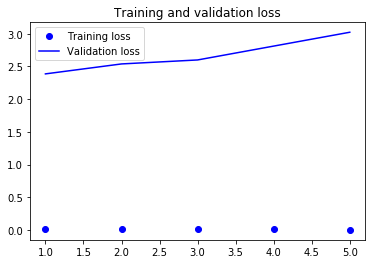

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Setting up a data augmentation configuration via ImageDataGenerator

In [22]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

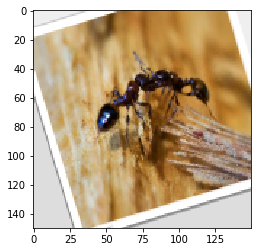

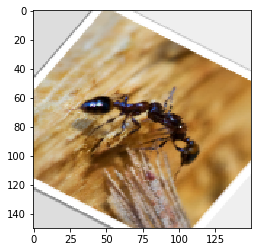

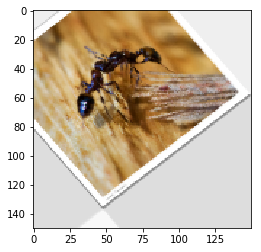

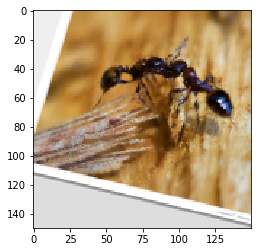

In [31]:
import os
#This is module with image preprocessing utilities
from keras.preprocessing import image
fnames = [os.path.join(train_dir+'/ants', fname) for fname in os.listdir(train_dir+'/ants')]
# We pick one image to "augment"
img_path = fnames[3]
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

Defining a new convnet that includes dropout

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

Training our convnet using data augmentation generators

In [34]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=10,
            validation_data=validation_generator,
            validation_steps=50)

Found 244 images belonging to 2 classes.
Found 153 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 34s 344ms/step - loss: 0.6558 - acc: 0.5896 - val_loss: 0.6478 - val_acc: 0.6209
Epoch 2/10
100/100 [==============================] - 32s 317ms/step - loss: 0.6079 - acc: 0.6578 - val_loss: 0.6171 - val_acc: 0.6405
Epoch 3/10
100/100 [==============================] - 32s 316ms/step - loss: 0.5747 - acc: 0.6868 - val_loss: 0.6601 - val_acc: 0.6405
Epoch 4/10
100/100 [==============================] - 32s 315ms/step - loss: 0.5435 - acc: 0.7130 - val_loss: 0.8083 - val_acc: 0.5882
Epoch 5/10
100/100 [==============================] - 31s 312ms/step - loss: 0.5236 - acc: 0.7356 - val_loss: 0.5421 - val_acc: 0.7190
Epoch 6/10
100/100 [==============================] - 31s 313ms/step - loss: 0.5010 - acc: 0.7525 - val_loss: 0.5474 - val_acc: 0.7124
Epoch 7/10
100/100 [==============================] - 31s 314ms/step - loss: 0.4750 - acc: 0.7715 - val_loss

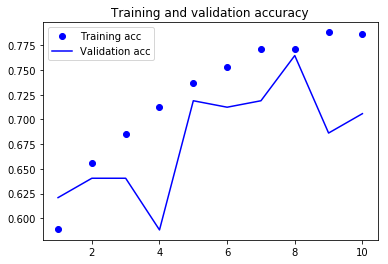

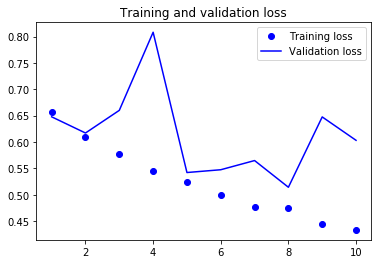

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Instantiating the VGG16 convolutional base

In [35]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

Displaying a summary of the convolutional base

In [37]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

Extracting features using the pre-trained convolutional base

In [38]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/home/ravitha/D/pyTorch_models/hymenoptera_data/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                        directory,
                        target_size=(150, 150),
                        batch_size=batch_size,
                        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 244)
validation_features, validation_labels = extract_features(validation_dir, 153)


Found 244 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


In [40]:
train_features = np.reshape(train_features, (244, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (153, 4 * 4 * 512))

In [41]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
            loss='binary_crossentropy',
            metrics=['acc'])

In [42]:
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 244 samples, validate on 153 samples
Epoch 1/30
244/244 [==============================] - 0s 939us/step - loss: 0.8027 - acc: 0.5164 - val_loss: 0.6684 - val_acc: 0.6405
Epoch 2/30
244/244 [==============================] - 0s 148us/step - loss: 0.6502 - acc: 0.6516 - val_loss: 0.6377 - val_acc: 0.6471
Epoch 3/30
244/244 [==============================] - 0s 150us/step - loss: 0.6296 - acc: 0.6557 - val_loss: 0.5891 - val_acc: 0.7516
Epoch 4/30
244/244 [==============================] - 0s 154us/step - loss: 0.5924 - acc: 0.6762 - val_loss: 0.5702 - val_acc: 0.7647
Epoch 5/30
244/244 [==============================] - 0s 150us/step - loss: 0.5306 - acc: 0.7787 - val_loss: 0.5393 - val_acc: 0.7908
Epoch 6/30
244/244 [==============================] - 0s 154us/step - loss: 0.5149 - acc: 0.7623 - val_loss: 0.5340 - val_acc: 0.7582
Epoch 7/30
244/244 [==============================] - 0s 148us/step - loss: 0.5076 - acc: 0.7623 - val_loss: 0.5101 - val_acc: 0.7712
Epoch 8/30
244/2

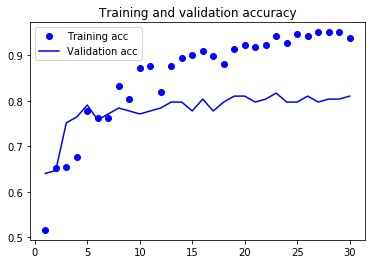

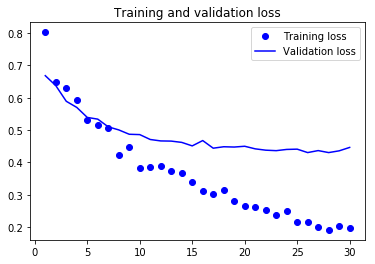

In [43]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Adding a densely-connected classifier on top of the convolutional base

In [44]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Freezing the convolutional base

In [45]:
conv_base.trainable = False

In [46]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [47]:
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                    # This is the target directory
                    train_dir,
                    # All images will be resized to 150x150
                    target_size=(150, 150),
                    batch_size=20,
                    # Since we use binary_crossentropy loss, we need binary labels
                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=20,
                        class_mode='binary')

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=2e-5),
                metrics=['acc'])

history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

Found 244 images belonging to 2 classes.
Found 153 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 20s 204ms/step - loss: 0.5683 - acc: 0.7165 - val_loss: 0.4846 - val_acc: 0.7996
Epoch 2/30
100/100 [==============================] - 19s 187ms/step - loss: 0.4425 - acc: 0.8051 - val_loss: 0.4542 - val_acc: 0.8090
Epoch 3/30
100/100 [==============================] - 19s 187ms/step - loss: 0.3874 - acc: 0.8345 - val_loss: 0.4416 - val_acc: 0.8038
Epoch 4/30
100/100 [==============================] - 19s 188ms/step - loss: 0.3640 - acc: 0.8455 - val_loss: 0.4475 - val_acc: 0.7907
Epoch 5/30
100/100 [==============================] - 19s 190ms/step - loss: 0.3464 - acc: 0.8495 - val_loss: 0.4320 - val_acc: 0.8058
Epoch 6/30
100/100 [==============================] - 19s 186ms/step - loss: 0.3194 - acc: 0.8680 - val_loss: 0.4438 - val_acc: 0.8424
Epoch 7/30
100/100 [==============================] - 19s 186ms/step - loss: 0.2918 - acc: 0.8785 - val_loss

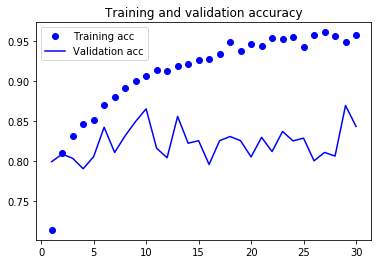

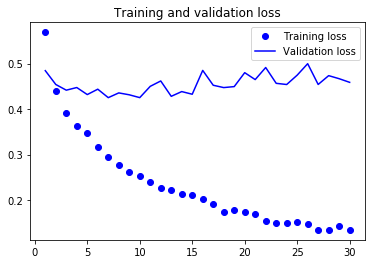

In [48]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Unfreeze layers in Convolutional Base

In [49]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [54]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-5),
metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 21s 209ms/step - loss: 0.0104 - acc: 0.9975 - val_loss: 0.5751 - val_acc: 0.9061
Epoch 2/10
100/100 [==============================] - 19s 188ms/step - loss: 0.0058 - acc: 0.9990 - val_loss: 0.6355 - val_acc: 0.9043
Epoch 3/10
100/100 [==============================] - 19s 190ms/step - loss: 0.0060 - acc: 0.9990 - val_loss: 0.5833 - val_acc: 0.8967
Epoch 4/10
100/100 [==============================] - 19s 187ms/step - loss: 0.0062 - acc: 0.9975 - val_loss: 0.5716 - val_acc: 0.8810
Epoch 5/10
100/100 [==============================] - 19s 190ms/step - loss: 0.0034 - acc: 0.9990 - val_loss: 0.8182 - val_acc: 0.8413
Epoch 6/10
100/100 [==============================] - 19s 192ms/step - loss: 0.0032 - acc: 0.9995 - val_loss: 0.6225 - val_acc: 0.9096
Epoch 7/10
100/100 [==============================] - 19s 189ms/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.8077 - val_acc: 0.8831
Epoch 8/10
100/100 [==============================] - 1

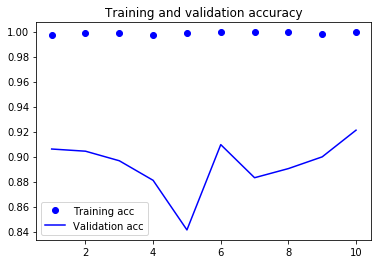

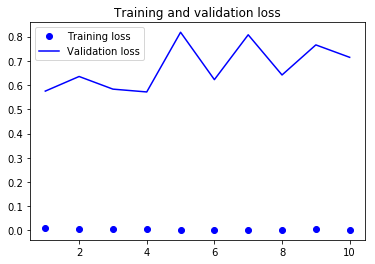

In [55]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [2]:
#https://github.com/ChenjieXu/selective_search
import skimage
from selective_search import selective_search
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [12]:
# Load image as NumPy array from image files
image = skimage.io.imread('/home/ravitha/Desktop/index.jpeg')

# Run selective search using single mode
boxes = selective_search.selective_search(image, mode='fast')

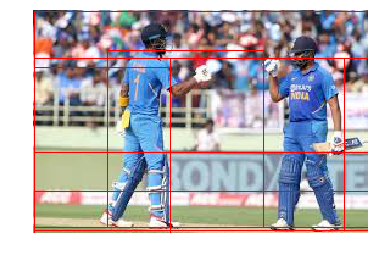

In [17]:
# Filter box proposals
boxes_filter = selective_search.box_filter(boxes, min_size=100, topN=10)

# draw rectangles on the original image
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image)
for x1, y1, x2, y2 in boxes_filter:
    bbox = mpatches.Rectangle(
        (x1, y1), (x2-x1), (y2-y1), fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(bbox)

plt.axis('off')
plt.show()
